In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import pickle
import os
import numpy as np
import cv2
import json

In [2]:
import sys
sys.path.append('/opt/workspace/src/python_scripts/')
import ops_files_operations as files
import ops_logger as log
import ops_face_detection as fd
import ops_face_recognition as fr

In [3]:
script_name = os.path.basename(__name__)
path_arr = os.getcwd().split(os.path.sep)
os.chdir(os.path.sep.join(path_arr[:path_arr.index('src')+1]))

2022-08-21 10:42:21,679 - create_logger - INFO - Log created properly.
2022-08-21 10:42:21,880 - shutdown_logger - INFO - Logger shutdown.


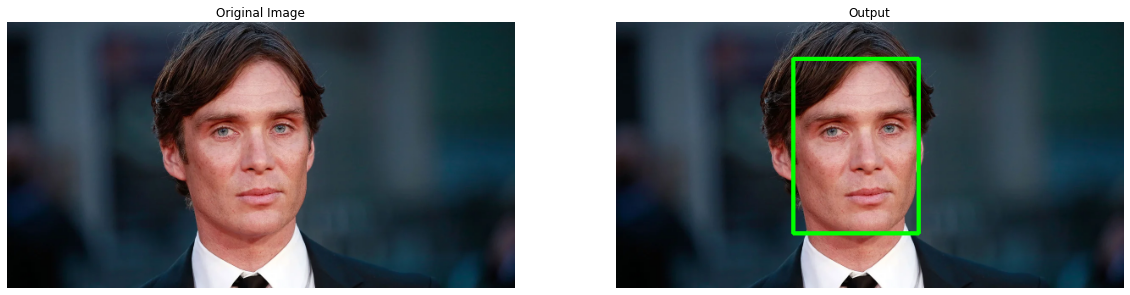

In [4]:
test_image_path = './datasets/test_image.webp' #'./datasets/actor_faces/2037_cillian_murphy/cillian_murphy_7.jpg'
test_embeddings = fd.get_embeddings_from_image(test_image_path, display = True)

In [14]:
target_embeddings = np.array(test_embeddings)

In [5]:
test_embeddings

[array([ 0.1301116 ,  0.00817512, -0.18252572,  0.00562752,  0.0682572 ,
         0.19124681,  0.11245503, -0.05492819, -0.12392393,  0.01693162,
        -0.00951827,  0.02068879,  0.05746784, -0.12672602,  0.00039937,
        -0.08264945, -0.06584326, -0.0053265 ,  0.0841872 ,  0.05147761,
         0.07291041, -0.05896154, -0.04382556, -0.07899549,  0.04672554,
         0.06082081, -0.09420401, -0.22819678, -0.02573336,  0.11841788,
        -0.01093922,  0.06901357, -0.1191425 ,  0.01045754,  0.1526165 ,
        -0.03526422, -0.00260496,  0.00950197,  0.10373165, -0.22552742,
         0.05836293, -0.13700312,  0.01934817,  0.1708165 , -0.15443239,
         0.0601228 ,  0.1033983 ,  0.08113926, -0.12984599, -0.03072272,
        -0.0085092 ,  0.008602  ,  0.06447256,  0.00307367,  0.11662645,
        -0.04080375, -0.05953804,  0.07179415, -0.0334499 , -0.13718262,
         0.00221845, -0.05414775,  0.22590554, -0.10442036,  0.10575838,
        -0.01568112, -0.00396572,  0.01830537,  0.0

In [15]:
target_embeddings

array([[ 0.1301116 ,  0.00817512, -0.18252572,  0.00562752,  0.0682572 ,
         0.19124681,  0.11245503, -0.05492819, -0.12392393,  0.01693162,
        -0.00951827,  0.02068879,  0.05746784, -0.12672602,  0.00039937,
        -0.08264945, -0.06584326, -0.0053265 ,  0.0841872 ,  0.05147761,
         0.07291041, -0.05896154, -0.04382556, -0.07899549,  0.04672554,
         0.06082081, -0.09420401, -0.22819678, -0.02573336,  0.11841788,
        -0.01093922,  0.06901357, -0.1191425 ,  0.01045754,  0.1526165 ,
        -0.03526422, -0.00260496,  0.00950197,  0.10373165, -0.22552742,
         0.05836293, -0.13700312,  0.01934817,  0.1708165 , -0.15443239,
         0.0601228 ,  0.1033983 ,  0.08113926, -0.12984599, -0.03072272,
        -0.0085092 ,  0.008602  ,  0.06447256,  0.00307367,  0.11662645,
        -0.04080375, -0.05953804,  0.07179415, -0.0334499 , -0.13718262,
         0.00221845, -0.05414775,  0.22590554, -0.10442036,  0.10575838,
        -0.01568112, -0.00396572,  0.01830537,  0.0

In [7]:
embeddings_folder = './models/embeddings'
recognizer_path = './models/recognizers'
predictions = fr.predict_probabilities(test_embeddings,embeddings_folder,recognizer_path)

2022-08-21 10:43:17,075 - create_logger - INFO - Log created properly.
2022-08-21 10:43:17,094 - predict_probabilities - INFO - Probabilities predicted with model embeddings_1 for given embeddings.
2022-08-21 10:43:17,099 - shutdown_logger - INFO - Logger shutdown.


In [8]:
predictions

{'13022_tom_berenger': 0.21332142636605664,
 '173212_tohoru_masamune': 0.10141480996949558,
 '2037_cillian_murphy': 0.19806356929877666,
 '24045_joseph_gordon-levitt': 0.02238970140876649,
 '2524_tom_hardy': 0.019586546064887078,
 '27578_elliot_page': 0.019422697144822355,
 '3895_michael_caine': 0.05113869408089778,
 '3899_ken_watanabe': 0.04686176197023223,
 '4935_pete_postlethwaite': 0.06257196398712811,
 '526_lukas_haas': 0.09796073516477675,
 '6193_leonardo_dicaprio': 0.024202212044717994,
 '66441_talulah_riley': 0.0254730735159365,
 '8293_marion_cotillard': 0.06105117085410583,
 '95697_dileep_rao': 0.00945179141250084,
 '967376_taylor_geare': 0.0470898467168997}

In [ ]:
path = './models/embeddings/embeddings_metadata.json'
embeddings_folder = './models/embeddings'
recognizer_path = './models/recognizers'
embeddings = {}
metadata_dict = {
        "execution_timestamp": '2022-08-15 22:01:01',
        "process_time": 145,
        "total_actors": 13
    }

In [ ]:
logger = log.create_logger('./models/logs',script_name,level='debug')

In [ ]:
fd.create_embeddings_model()

In [ ]:
fd.create_recognizer(embeddings_folder,recognizer_path,logger)

In [ ]:
log.shutdown_logger(logger)

In [ ]:
files.create_pickle_file(metadata_dict,'./models/recognizers/embeddings_1_regocognizer.pickle',logger)

In [ ]:
files.get_latest_model_name(path,logger)

In [ ]:
fr.create_recognizer(embeddings_folder,recognizer_path)